### Notebook 3_4

## State Space Model Ⅱ

#### Student Learning Outcomes
* Learn the initial condition set-up for state space model
* Learn the stability criteria of transfer function
* Learn the stability criteria of  state space model
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: State Space with Initial Condition</h2>
</div>


In the previous notebook, you saw that state-space models can naturally **handle MIMO (Multiple Input, Multiple Output) systems** — a major advantage over transfer function.

In this notebook, we'll explore another key advantage of state-space models: the ability to **handle non-zero initial conditions directly**, which transfer functions cannot do.

-------------
If we **re-visit the ball-hitting problem last class**.

$$\dot{x}(t) = \begin{bmatrix}\dot{x}_1(t) \\\dot{x}_2(t)\end{bmatrix}=\underbrace{\begin{bmatrix}0 & 1 \\0 & -0.441\end{bmatrix}}_{A}x(t) +\underbrace{\begin{bmatrix}0 \\3.68\end{bmatrix}}_{B}u(t)$$

$$y(t) =\underbrace{\begin{bmatrix}1 & 0 \\0 & 1\end{bmatrix}}_{C}x(t) +\underbrace{\begin{bmatrix}0 \\0\end{bmatrix}}_{D}u(t)$$


* $x_1(t) = p(t)$ (position)
* $x_2(t) = v(t)$ (velocity)
* State vector $ \mathbf{x}(t) = \begin{bmatrix} p(t) \\ v(t) \end{bmatrix} $
* Input vector $ \mathbf{u}(t) = \begin{bmatrix} F_{\mathrm{hit}}(t) \end{bmatrix} $ 
* Output vector  $ \mathbf{y}(t) = \begin{bmatrix} p(t) \\ v(t) \end{bmatrix} $

Here, the state vector $\mathbf{x}(t)$ can be configured with initial conditions.

For example $p(0) = 10$, $v(0) = 5$. It indicates that the initial position of your ball is at 10 meters, the initial velocity of your ball is at 5 meters.

---------
In SciPy, if you check the documentations of ```scipy.signal.impulse```, ```scipy.signal.step```, ```scipy.signal.lsim```, they always allow an optional entry (parameter), ```X0```, for state-space model.


**Note:** Due to implementation differences, 
* `scipy.signal.impulse` and  require conditions to be explicitly defined using `np.array(...)` with the correct shape. 
* `scipy.signal.step` and `scipy.signal.lsim` require conditions to be specified directly using standard Python lists `[ , ]`.

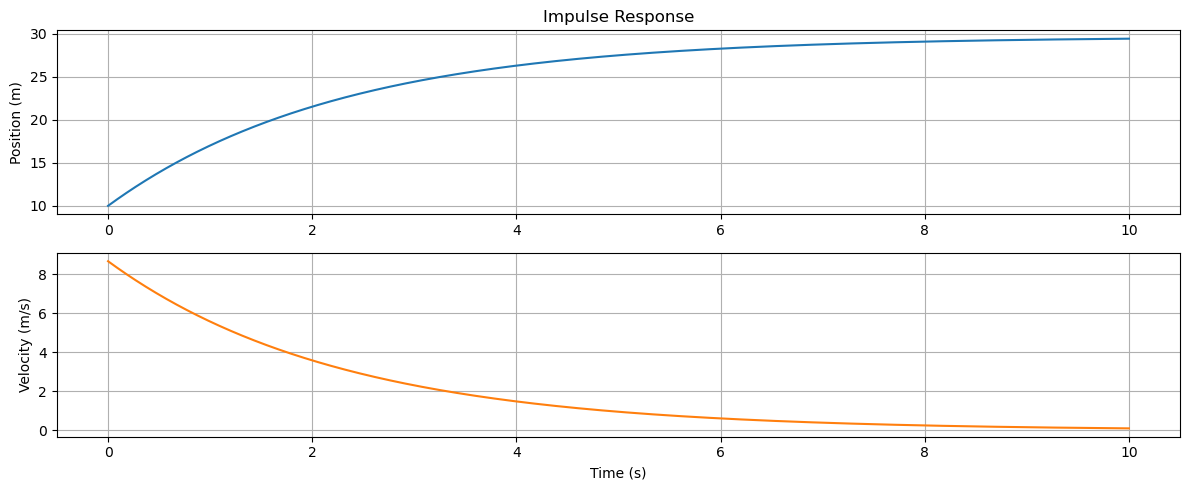

In [2]:
A = np.array([[0, 1], [0, -0.441]])
B = np.array([[0], [3.68]])
C = np.array([[1, 0], [0, 1]])
D = np.array([[0], [0]]) 
SSModel = sig.lti(A, B, C, D)

# Impulse Response
t = np.linspace(0, 10, 1000)

## Set Initial Conditions
initial_condition = np.array([[10], [5]])
_, y_out = sig.impulse(SSModel, T=t, X0=initial_condition)

# Plotting
plt.figure(figsize=(12, 5))
# Position subplot
plt.subplot(2, 1, 1)
plt.plot(t, y_out[:, 0], color="tab:blue")
plt.ylabel('Position (m)')
plt.title('Impulse Response')
plt.grid(True)

# Velocity subplot
plt.subplot(2, 1, 2)
plt.plot(t, y_out[:, 1], color="tab:orange")
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')
plt.grid(True)

plt.tight_layout()

--------------
**Practice**: Let's re-visit the Worksheet problem, a spaceship is returning to the earth.


$$\dot{x}(t) = \begin{bmatrix}\dot{x}_1(t) \\\dot{x}_2(t)\end{bmatrix}=\underbrace{\begin{bmatrix}-0.1 & 0.2 & 0\\0 & 0 & 1 \\-0.3 & -0.4 &-1.5\end{bmatrix}}_{A}x(t) +\underbrace{\begin{bmatrix}0 \\0\\0.5\end{bmatrix}}_{B}u(t)$$

$$y(t) =\underbrace{\begin{bmatrix}0 & 1 & 0 \\0 & 0 & 1\end{bmatrix}}_{C}x(t) +\underbrace{\begin{bmatrix}0 \\0\end{bmatrix}}_{D}u(t)$$

  
* $x_1(t) = \phi(t)$ (yaw angle)
* $x_2(t) = \theta(t)$ (pitch angle)
* * $x_3(t) = \omega(t)$ (pitch angular velocity)
* State vector $ \mathbf{x}(t) = \begin{bmatrix} \phi(t) \\\theta(t) \\ \omega(t) \end{bmatrix} $
* Input vector $ \mathbf{u}(t) = \begin{bmatrix} u(t) \end{bmatrix} $ 
* Output vector  $ \mathbf{y}(t) = \begin{bmatrix} \theta(t) \\ \omega(t) \end{bmatrix} $

Assume initial conditions: $\phi(0) = 0.088$ rad, $\theta(0) = -0.035$ rad, $\omega(0) = 0.052$ rad/s

------
Now, it is your job to create a code cell to plot the **step response** of this system with given initial conditions. 

Place two outputs in separate subplots.

<div style="border-left: 4px solid #FF0000; padding: 10px; background-color: #FFE5E5;">
<strong>[!CRITICAL]</strong> Type every numbers in A, B, C, D as float numbers, not int numbers. Otherwise Scipy may fail to generate response.
</div>

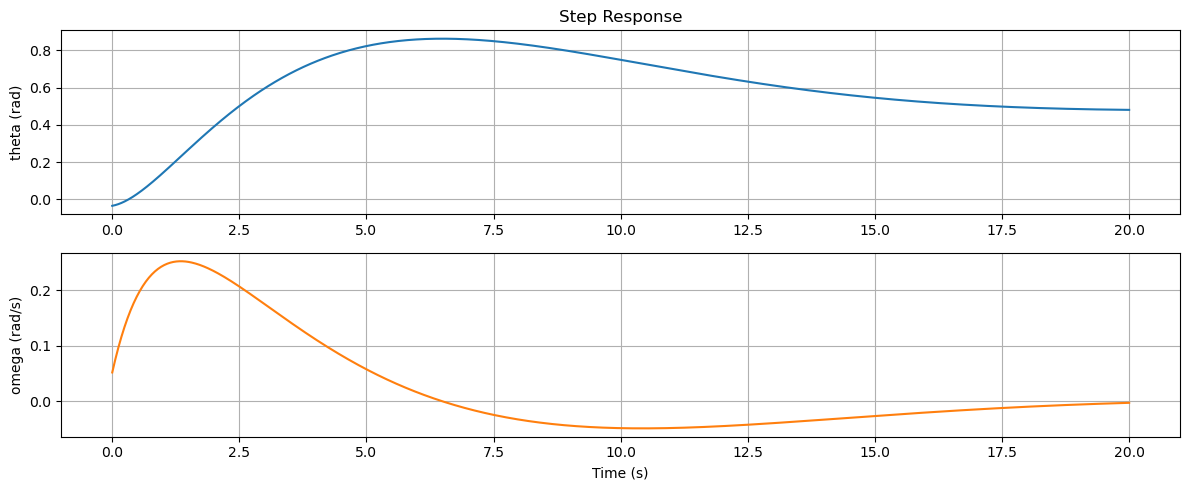

In [5]:
A = np.array([[-0.1, 0.2, 0.], [0., 0., 1], [-0.3, -0.4, -1.5]])
B = np.array([[0.], [0.], [0.5]])
C = np.array([[0., 1., 0.], [0., 0., 1.]])
D = np.array([[0.], [0.]]) 
SSModel = sig.lti(A, B, C, D)

# Step Response
t = np.linspace(0, 20, 1000)

## Set Initial Conditions
initial_condition = [0.088, -0.035, 0.052]
_, y_out = sig.step(SSModel, T=t, X0=initial_condition)

# Plotting
plt.figure(figsize=(12, 5))
# Position subplot
plt.subplot(2, 1, 1)
plt.plot(t, y_out[:, 0], color="tab:blue")
plt.ylabel('theta (rad)')
plt.title('Step Response')
plt.grid(True)

# Velocity subplot
plt.subplot(2, 1, 2)
plt.plot(t, y_out[:, 1], color="tab:orange")
plt.ylabel('omega (rad/s)')
plt.xlabel('Time (s)')
plt.grid(True)

plt.tight_layout()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: System Stability</h2>
</div>


In System Analysis, an Important Concept is **BIBO Stability** (Bounded Input, Bounded Output)

In plain words, if the system input is bounded, the corresponding system output won't "blow up"

We will discuss the BIBO stability for transfer function and state-space separately.

--------
**BIBO stability for transfer function**

If the denominator has terms like $(s+a)$, they lead to terms of the form $e^{-at}$ in the time-domain response. (think about the inverse Laplace)

For example,

* $H(s) = \dfrac{\cdots}{s+9}$, its time-domain response contains a term of $e^{-9t}$.

Since the exponent is negative, this term decays to zero as $ t \to \infty $

* $H(s) = \dfrac{\cdots}{s^2+10s+21}=\dfrac{\cdots}{(s+3)(s+7)}$, its time-domain response contains terms of $e^{-3t}$,  $e^{-7t}$

Both exponents are negative, both decay to zero as $ t \to \infty $  

* $H(s) = \dfrac{\cdots}{s^2+10s+125}=\dfrac{\cdots}{(s+5+10j)(s+5-10j)}$, its time-domain response contains terms of $e^{(-5-10j)t}$,  $e^{(-5+10j)t}$

The $ e^{-5t} $ part causes exponential decay, The imaginary part $ \pm 10j $ introduces sine oscillations

--------
What if the $a$ in $(s+a)$ terms are negative?

Now, it is your job to check the step response of the following:

* $H_1(s) = \dfrac{1}{s-9}$
* $H_2(s) = \dfrac{1}{(s-3)(s+7)} = \dfrac{1}{s^2+4s-21}$
* $H_3(s) =\dfrac{1}{(s-5+10j)(s-5-10j)} = \dfrac{1}{s^2-10s+125}$

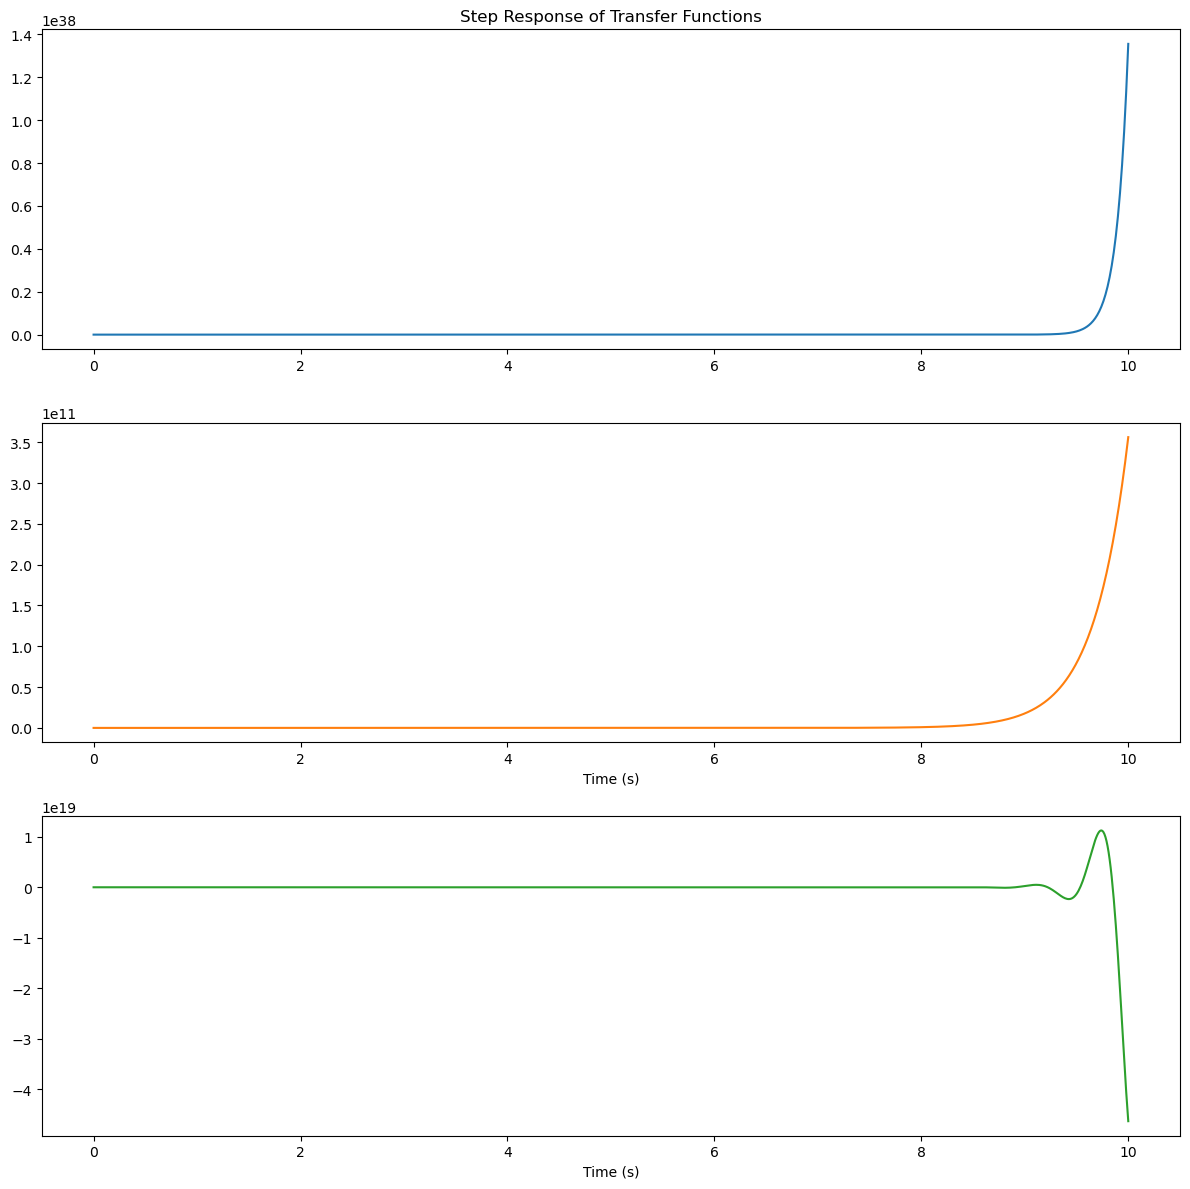

In [7]:
# It is your job to input H1(s), H2(s), H3(s) in Python
H1 = sig.lti([1], [1, -9])
H2 = sig.lti([1], [1, 4, -21])
H3 = sig.lti([1], [1, -10, 125])

# Response is already coded
t_task2 = np.linspace(0, 10, 1000)
_, y1_task2 = sig.step(H1, T=t_task2)
_, y2_task2 = sig.step(H2, T=t_task2)
_, y3_task2 = sig.step(H3, T=t_task2)

# Plot is already coded
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.plot(t_task2,  y1_task2, color="tab:blue")
plt.title('Step Response of Transfer Functions')

plt.subplot(3, 1, 2)
plt.plot(t_task2,  y2_task2, color="tab:orange")
plt.xlabel('Time (s)')

plt.subplot(3, 1, 3)
plt.plot(t_task2,  y3_task2, color="tab:green")
plt.xlabel('Time (s)')
plt.tight_layout()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot: 1 pt</strong>
</span>

From your plots, you can see every signal quickly "blow up" to a super large number. These are counter-examples of BIBO stable.

For each transfer function, observe their plot and indicate the response value at 10 seconds.

* the step response of $H_1(s)$ at 10 seconds: ??
* the step response of $H_2(s)$ at 10 seconds: ??
* the step response of $H_3(s)$ at 10 seconds: ??

**Answer**

* the step response of $H_1(s)$ at 10 seconds: $1.4\times 10^{38}$
* the step response of $H_2(s)$ at 10 seconds: $3.5\times 10^{11}$
* the step response of $H_3(s)$ at 10 seconds: $-5\times 10^{19}$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Values: 1 pt</strong>
</span>

Here is the **Conclusion**:

> A transfer function H(s) is **BIBO stable** if:
> 
> All roots of its the denominator (i.e., all poles of $ H(s)$ / the roots of characteristic equation) have **strictly negative real parts** — that is, lie in the **left-half of the complex plane**


--------
**BIBO stability for state-space**

For state-space
$$\begin{aligned}
\dot{\mathbf{x}}(t) &= A \mathbf{x}(t) + B \mathbf{u}(t) \\
\mathbf{y}(t) &= C \mathbf{x}(t) + D \mathbf{u}(t)
\end{aligned}$$


(The following derivation comes from more advanced linear algebra, so you don’t need to memorize it right now — just know that the connection exists and know the conclusion.)

It can be converted to transfer function using: 
$$H(s) = C (sI - A)^{-1} B + D$$

In the converted transfer function, its denominator is $\det(sI-A)$, $I$ is an identity matrix.

Solving equation $\det(sI - A) = 0$ for $s$ gives the eigenvalues of $A$ matrix.


Here is the **Conclusion**:

> A state-space model is **BIBO stable** if:
> 
> All eigenvalues of its $A$ matrix have **strictly negative real parts** — that is, lie in the **left-half of the complex plane**

Let's check 3 systems in Python.

Note, In Numpy, you can get eigenvalues of a matrix by ```np.linalg.eigvals( )```

* State-space Model 1
$$
\begin{aligned}
\dot{x}(t) &= \begin{bmatrix} -10 & -20 \\ 1 & 0 \end{bmatrix} x(t) + \begin{bmatrix} 1 \\ 0 \end{bmatrix} u(t) \\
y(t) &= \begin{bmatrix} 0 & 1 \end{bmatrix} x(t) + \begin{bmatrix} 0 \end{bmatrix} u(t)
\end{aligned}
$$
* State-space Model 2
$$
\begin{aligned}
\dot{x}(t) &= \begin{bmatrix} -8 & 55 & 350 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix} x(t) + \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} u(t) \\
y(t) &= \begin{bmatrix} 0 & 0 & 10 \end{bmatrix} x(t) + \begin{bmatrix} 0 \end{bmatrix} u(t)
\end{aligned}
$$
* State-space Model 3
$$
\begin{aligned}
\dot{x}(t) &= \begin{bmatrix} 20 & -456 & -1000 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix} x(t) + \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} u(t) \\
y(t) &= \begin{bmatrix} 0 & 0 & 30 \end{bmatrix} x(t) + \begin{bmatrix} 0 \end{bmatrix} u(t)
\end{aligned}
$$


<div style="border-left: 4px solid #FF0000; padding: 10px; background-color: #FFE5E5;">
<strong>[!CRITICAL]</strong> Type every numbers in A, B, C, D as float numbers, not int numbers. Otherwise Scipy may fail to generate response.
</div>

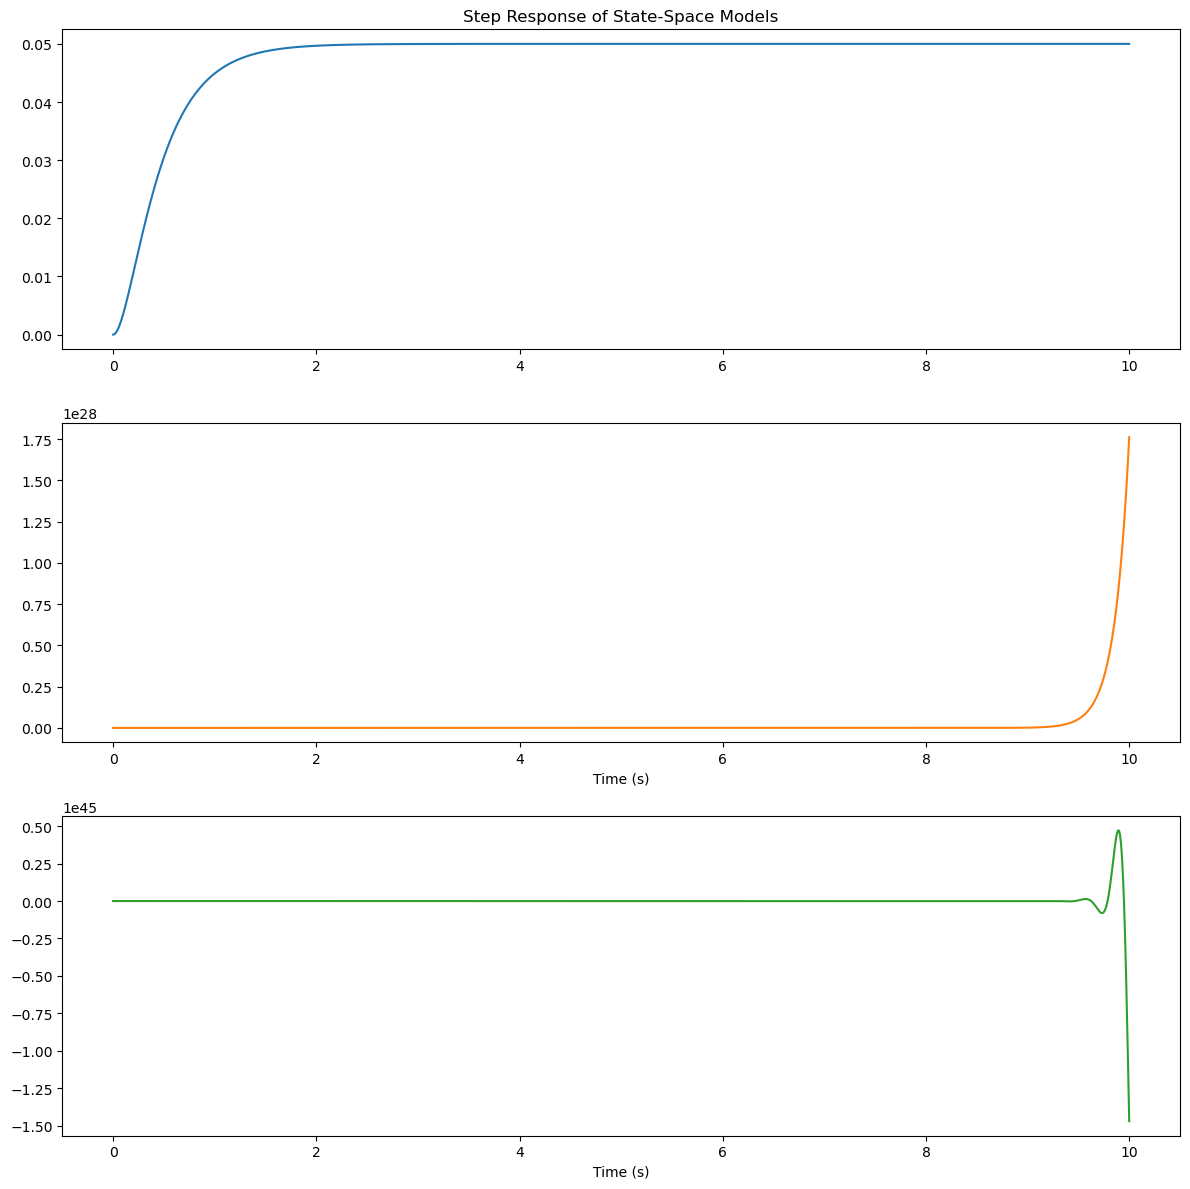

In [10]:
# Finish the code. You only need to type A1, A2, A3.
# The rest are already typed
A1 = np.array([[-10., -20.], [1., 0.]])
B1 = np.array([[1.],
        [0.]])
C1 = np.array([[0., 1.]])
D1 = np.array([[0.]])

A2 = np.array([[-8., 55., 350.], [1., 0., 0.], [0., 1., 0.]])
B2 = np.array([[1.],
        [0.],
        [0.]])
C2 = np.array([[ 0.,  0., 10.]])
D2 = np.array([[0.]])

A3 = np.array([[20., -456., -1000.], [1., 0., 0.], [0., 1., 0.]])
B3 = np.array([[1.],
        [0.],
        [0.]])
C3 = np.array([[ 0.,  0., 30.]])
D3 = np.array([[0.]])
    
SSModel1_task2 = sig.lti(A1, B1, C1, D1)
SSModel2_task2 = sig.lti(A2, B2, C2, D2)
SSModel3_task2 = sig.lti(A3, B3, C3, D3)

t_task2 = np.linspace(0, 10, 1000)
_, y1_task2_ss = sig.step(SSModel1_task2, T=t_task2)
_, y2_task2_ss = sig.step(SSModel2_task2, T=t_task2)
_, y3_task2_ss = sig.step(SSModel3_task2, T=t_task2)

# Plot is already coded
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.plot(t_task2,  y1_task2_ss, color="tab:blue")
plt.title('Step Response of State-Space Models')

plt.subplot(3, 1, 2)
plt.plot(t_task2,  y2_task2_ss, color="tab:orange")
plt.xlabel('Time (s)')

plt.subplot(3, 1, 3)
plt.plot(t_task2,  y3_task2_ss, color="tab:green")
plt.xlabel('Time (s)')
plt.tight_layout()

For each state-space model, observe their plot and indicate whether they are stable or unstable.

* the step response of State-space Model 1 : ??
* the step response of State-space Model 2 : ??
* the step response of State-space Model 3 : ??

**Answer**

* the step response of State-space Model 1 : Stable
* the step response of State-space Model 2 : Unstable
* the step response of State-space Model 3 : Unstable

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Stability Answer: 1 pt</strong>
</span>

Next, in Python, use `np.linalg.eigvals( )` to print the eigenvalues for each A matrix. Verify if your result matches the conclusion of stability

In [14]:
# use np.linalg.eigvals( ) to print

print('Eigenvalues of Model 1: ', np.linalg.eigvals(A1))
print('Eigenvalues of Model 2: ', np.linalg.eigvals(A2))
print('Eigenvalues of Model 3: ', np.linalg.eigvals(A3))

Eigenvalues of Model 1:  [-7.23606798 -2.76393202]
Eigenvalues of Model 2:  [  7. -10.  -5.]
Eigenvalues of Model 3:  [11.+19.46792233j 11.-19.46792233j -2. +0.j        ]


* For Model 2, $7$ is positive. So the overall system is unstable
* For Model 3, $11.+19.46792233j$ and $11.-19.46792233j$ both have positive real parts. So the overall system is unstable

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>print out: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


